# Analisis

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import set_matplotlib_formats
from sklearn.preprocessing import MinMaxScaler

set_matplotlib_formats('jpg')

warnings.filterwarnings('ignore')
%matplotlib inline

### Dataframe to analyze

In [3]:
data = pd.read_csv('../data/diamonds_train.csv')
data.head(10)

carat        cut color clarity  depth  table  price     x     y     z
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95
5   1.52      Ideal     F     SI2   61.2   57.0   9057  7.45  7.39  4.54
6   1.01       Fair     H     VS2   65.2   56.0   3733  6.23  6.19  4.05
7   1.52      Ideal     J     VS1   62.3   58.0   8608  7.32  7.35  4.57
8   0.31      Ideal     H     VS1   61.8   54.2    557  4.33  4.37  2.69
9   1.14      Ideal     G     SI1   61.7   56.0   6741  6.71  6.75  4.15

### Info of the parameters

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
carat      40455 non-null float64
cut        40455 non-null object
color      40455 non-null object
clarity    40455 non-null object
depth      40455 non-null float64
table      40455 non-null float64
price      40455 non-null int64
x          40455 non-null float64
y          40455 non-null float64
z          40455 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [5]:
data.describe().T

count         mean          std    min     25%      50%       75%  \
carat  40455.0     0.797706     0.475544    0.2    0.40     0.70     1.040   
depth  40455.0    61.752841     1.431725   43.0   61.00    61.80    62.500   
table  40455.0    57.446133     2.233535   43.0   56.00    57.00    59.000   
price  40455.0  3928.444469  3992.416147  326.0  945.00  2397.00  5331.000   
x      40455.0     5.729392     1.124453    0.0    4.71     5.69     6.540   
y      40455.0     5.732819     1.146650    0.0    4.72     5.71     6.540   
z      40455.0     3.537154     0.697062    0.0    2.91     3.52     4.035   

            max  
carat      4.50  
depth     79.00  
table     95.00  
price  18823.00  
x         10.23  
y         58.90  
z          8.06

### RAW Correlation between parameters

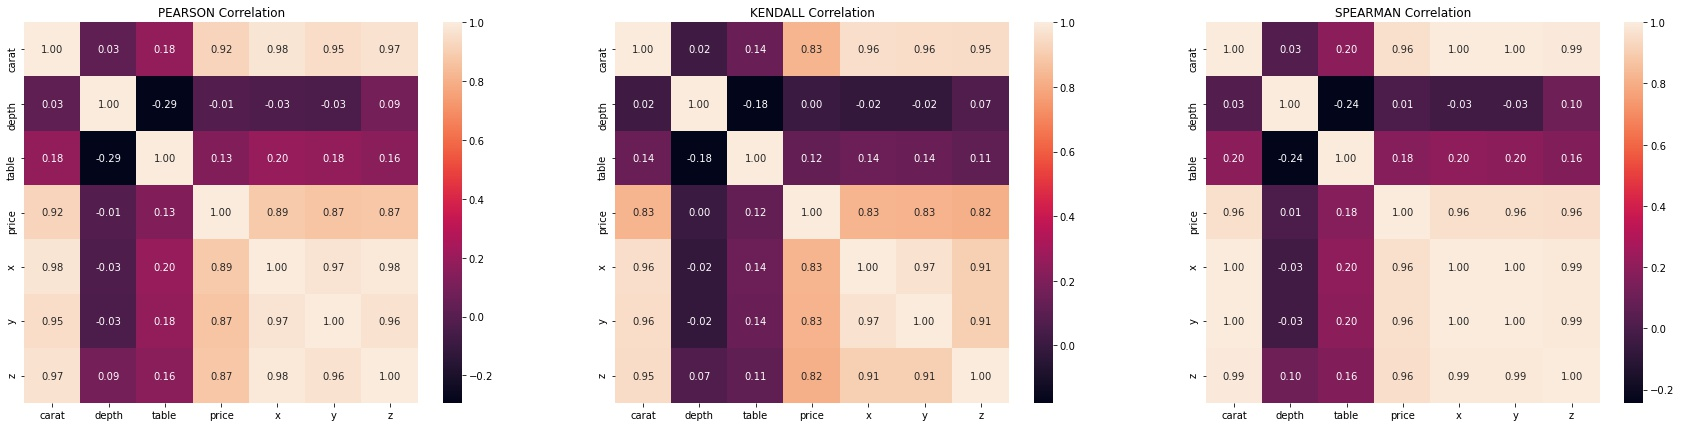

In [6]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(30, 7))
corr_methods = ['pearson', 'kendall', 'spearman']

for i in range(len(corr_methods)):
    sns.heatmap(data.corr(method=corr_methods[i]), annot=True, fmt='.2f', ax=ax[i]);
    ax[i].set_title(f'{corr_methods[i].upper()} Correlation')

plt.show()

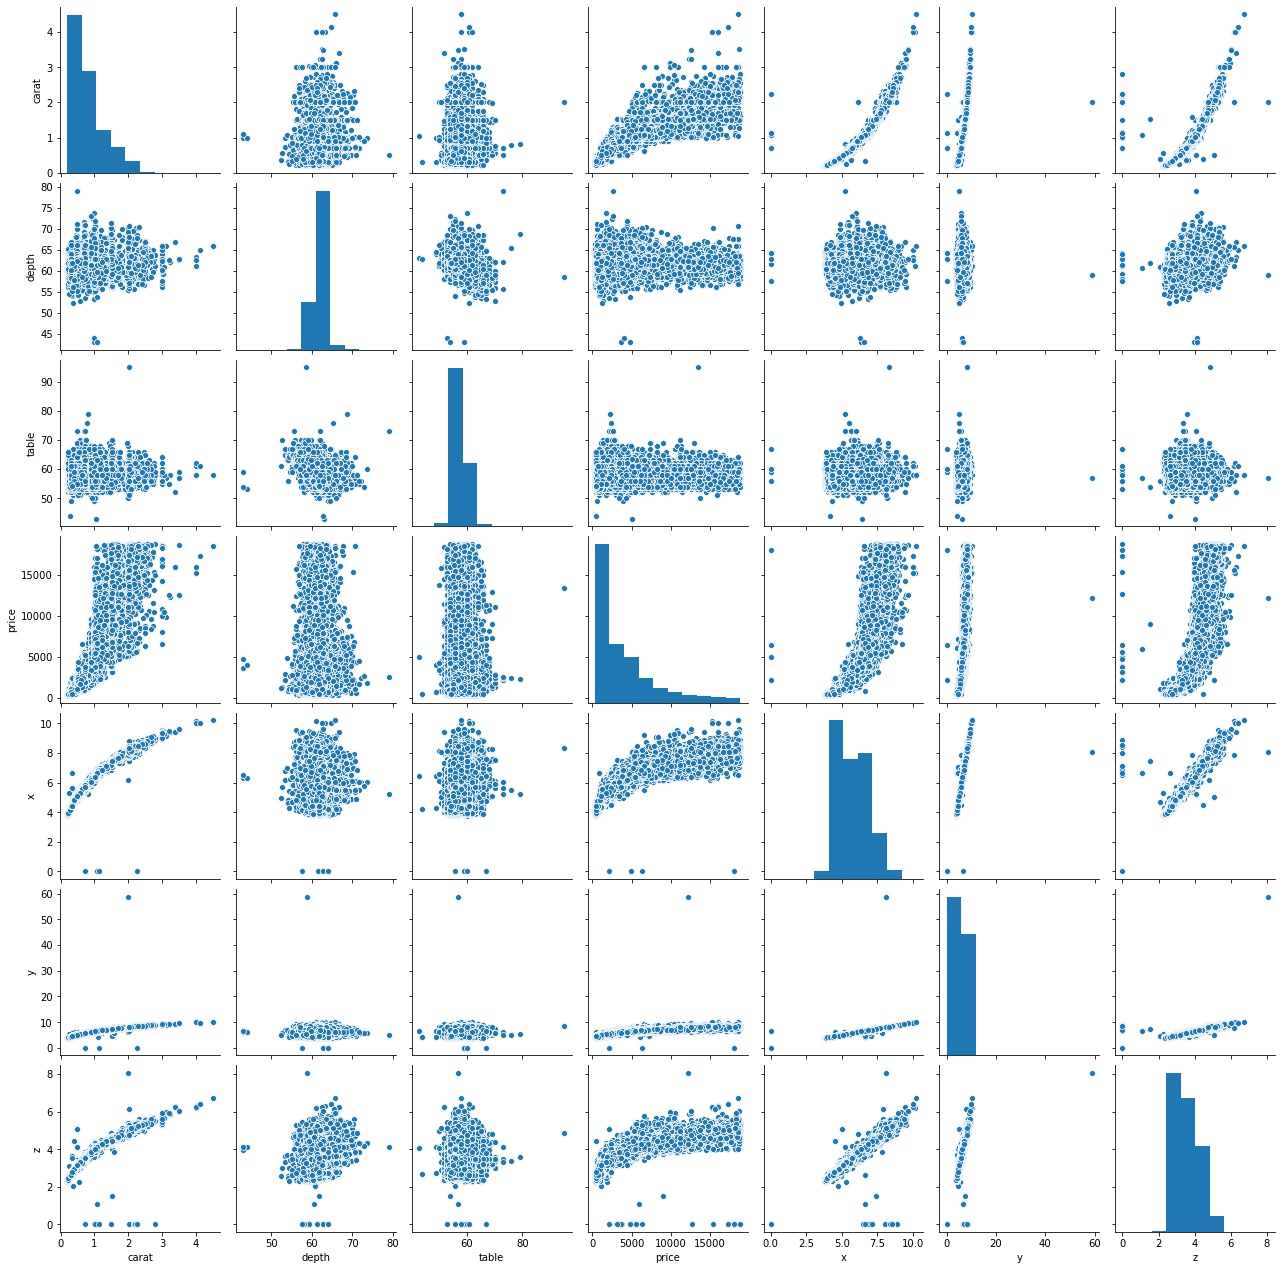

In [7]:
sns.pairplot(data)
plt.show()

We can see some correlation between different properties in a general way

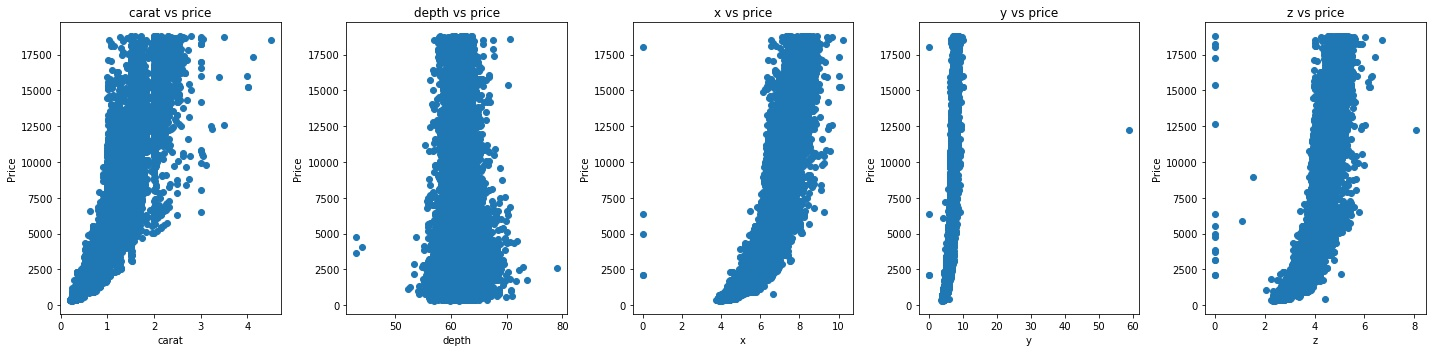

In [8]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]
ax5 = axes[4]

for ax, column in [[ax1, 'carat'], [ax2, 'depth'], [ax3, 'x'], [ax4, 'y'], [ax5, 'z']]:
    ax.scatter(data[column], data['price'])
    ax.set_title(f'{column} vs price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    plt.tight_layout()


Some correlations are as we expected to be, the higher, the more expensive.

Anyway, some diamonds have x, y, or z values equal to 0. It is necessary to clean those values to have a more accurate analysis



In [9]:
filter_x = data['x'] != 0
filter_y_01 = data['y'] != 0
filter_y_02 = data['y'] < 40
filter_z = data['z'] != 0
data_clean = data[filter_x & filter_y_01 & filter_y_02 & filter_z]

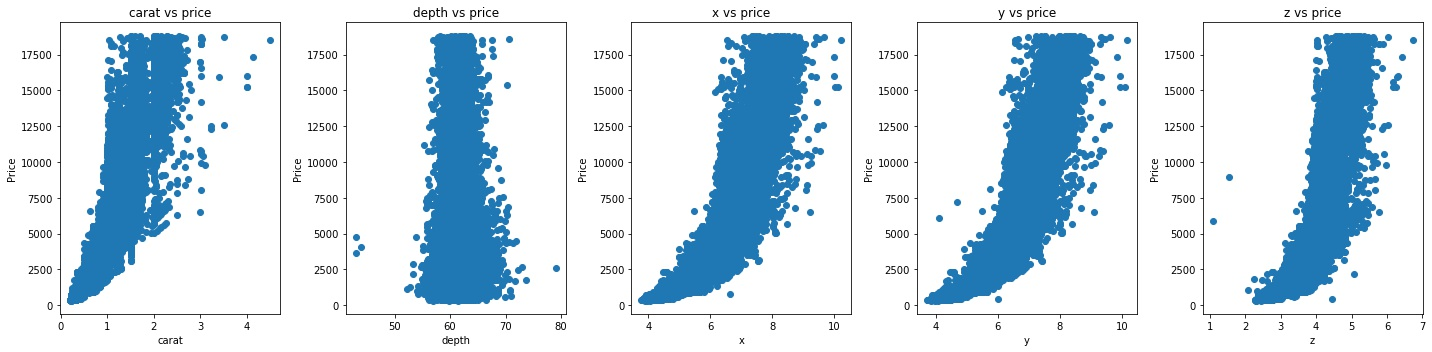

In [10]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]
ax5 = axes[4]

for ax, column in [[ax1, 'carat'], [ax2, 'depth'], [ax3, 'x'], [ax4, 'y'], [ax5, 'z']]:
    ax.scatter(data_clean[column], data_clean['price'])
    ax.set_title(f'{column} vs price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    plt.tight_layout()

Now the data seems to be more consistent.

Let's have a look at the values with very low depth and price between 2500 and 5000. Are they correct?

In [11]:
filter_depth = data_clean['depth'] < 50
data_clean[filter_depth]

carat    cut color clarity  depth  table  price     x     y     z
242     1.00   Fair     G     SI1   43.0   59.0   3634  6.32  6.27  3.97
3205    1.00   Fair     G     VS2   44.0   53.0   4032  6.31  6.24  4.12
30278   1.09  Ideal     J     VS2   43.0   54.0   4778  6.53  6.55  4.12

First of all let's see if the depth value is correct.

We know depth is z/[(x+y)/2]

In [12]:
data_clean['depth_calc'] = data_clean['z'] / ((data_clean['x'] + data_clean['y'])/2)
data_clean.head()

carat        cut color clarity  depth  table  price     x     y     z  \
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25   
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75   
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65   
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00   
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95   

   depth_calc  
0    0.624082  
1    0.630011  
2    0.654709  
3    0.638298  
4    0.604900

In [13]:
data_clean[filter_depth]

carat    cut color clarity  depth  table  price     x     y     z  \
242     1.00   Fair     G     SI1   43.0   59.0   3634  6.32  6.27  3.97   
3205    1.00   Fair     G     VS2   44.0   53.0   4032  6.31  6.24  4.12   
30278   1.09  Ideal     J     VS2   43.0   54.0   4778  6.53  6.55  4.12   

       depth_calc  
242      0.630659  
3205     0.656574  
30278    0.629969

We can see that depth values do not match with the calculated parameter depth_calc.

We will erase these 3 diamonds to have a more accurate analysis and reset the index.

In [14]:
data_clean.reset_index().tail(5)

index  carat    cut color clarity  depth  table  price     x     y  \
40433  40450   1.34  Ideal     G     VS1   62.7   57.0  10070  7.10  7.04   
40434  40451   2.02   Good     F     SI2   57.1   60.0  12615  8.31  8.25   
40435  40452   1.01  Ideal     H     SI1   62.7   56.0   5457  6.37  6.42   
40436  40453   0.33  Ideal     J     VS1   61.9   54.3    456  4.45  4.47   
40437  40454   1.24  Ideal     I     SI1   62.0   58.0   6232  6.83  6.88   

          z  depth_calc  
40433  4.43    0.626591  
40434  4.73    0.571256  
40435  4.01    0.627052  
40436  2.76    0.618834  
40437  4.25    0.619985

In [15]:
data_clean.drop([242, 3205, 30278], inplace=True)

In [16]:
data_clean.reset_index().tail(5)

index  carat    cut color clarity  depth  table  price     x     y  \
40430  40450   1.34  Ideal     G     VS1   62.7   57.0  10070  7.10  7.04   
40431  40451   2.02   Good     F     SI2   57.1   60.0  12615  8.31  8.25   
40432  40452   1.01  Ideal     H     SI1   62.7   56.0   5457  6.37  6.42   
40433  40453   0.33  Ideal     J     VS1   61.9   54.3    456  4.45  4.47   
40434  40454   1.24  Ideal     I     SI1   62.0   58.0   6232  6.83  6.88   

          z  depth_calc  
40430  4.43    0.626591  
40431  4.73    0.571256  
40432  4.01    0.627052  
40433  2.76    0.618834  
40434  4.25    0.619985

Let's plot again the graphs to see what we have now

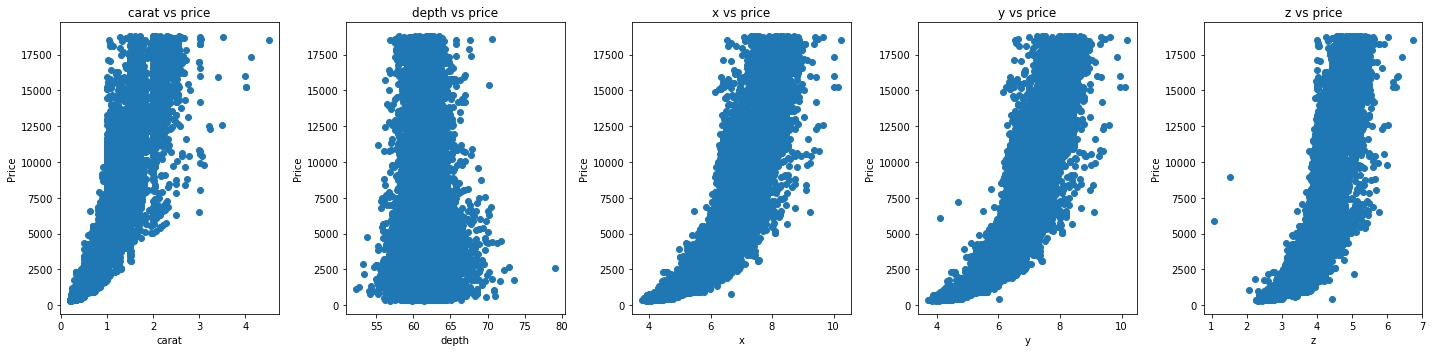

In [17]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]
ax5 = axes[4]

for ax, column in [[ax1, 'carat'], [ax2, 'depth'], [ax3, 'x'], [ax4, 'y'], [ax5, 'z']]:
    ax.scatter(data_clean[column], data_clean['price'])
    ax.set_title(f'{column} vs price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    plt.tight_layout()

Now let's analyze diamonds with z value very low and price between 5000 and 10000

In [18]:
filter_z = data_clean['z'] < 2
data_clean[filter_z]

carat    cut color clarity  depth  table  price     x     y     z  \
6688    1.07  Ideal     F     SI1   60.6   57.0   5909  6.62  6.67  1.07   
13044   1.53  Ideal     I     SI1   61.9   54.0   8971  7.43  7.50  1.53   

       depth_calc  
6688     0.161023  
13044    0.204956

We can see again that depth values do not match with the calculated parameter depth_calc.

Let's erase these values.

In [19]:
data_clean.drop([6688, 13044], inplace=True)
data_clean.reset_index().tail(5)

index  carat    cut color clarity  depth  table  price     x     y  \
40428  40450   1.34  Ideal     G     VS1   62.7   57.0  10070  7.10  7.04   
40429  40451   2.02   Good     F     SI2   57.1   60.0  12615  8.31  8.25   
40430  40452   1.01  Ideal     H     SI1   62.7   56.0   5457  6.37  6.42   
40431  40453   0.33  Ideal     J     VS1   61.9   54.3    456  4.45  4.47   
40432  40454   1.24  Ideal     I     SI1   62.0   58.0   6232  6.83  6.88   

          z  depth_calc  
40428  4.43    0.626591  
40429  4.73    0.571256  
40430  4.01    0.627052  
40431  2.76    0.618834  
40432  4.25    0.619985

Let's plot again the graphs to see what we have now

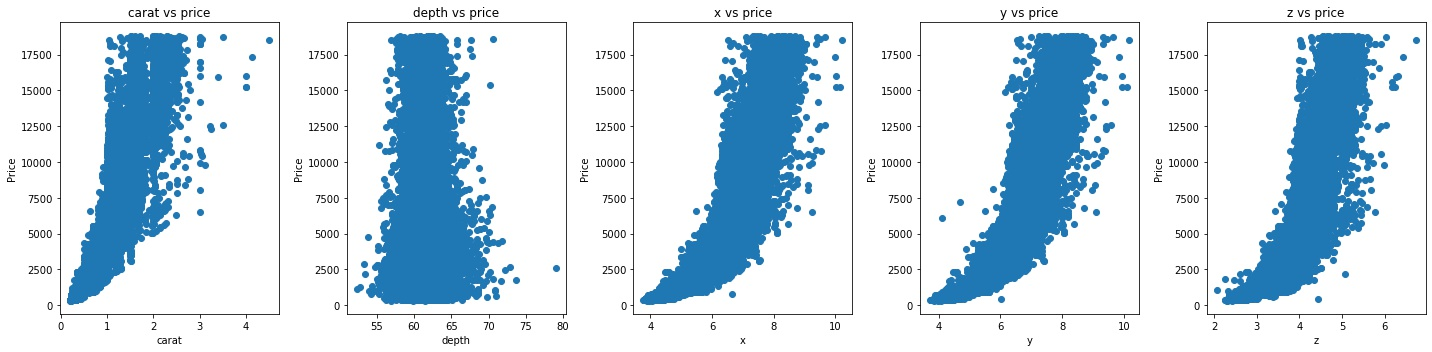

In [20]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]
ax5 = axes[4]

for ax, column in [[ax1, 'carat'], [ax2, 'depth'], [ax3, 'x'], [ax4, 'y'], [ax5, 'z']]:
    ax.scatter(data_clean[column], data_clean['price'])
    ax.set_title(f'{column} vs price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    plt.tight_layout()

Let's have a look again at depth values over 75

In [21]:
filter_depth = data_clean['depth'] > 75
data_clean[filter_depth]

carat   cut color clarity  depth  table  price     x     y     z  \
25248    0.5  Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09   

       depth_calc  
25248    0.787295

Let's compare with other diamonds with the same characteristics

In [22]:
data_clean[(data_clean['price'] > 2400) & (data_clean['price'] < 2700) & (data_clean['cut'] == 'Fair') & \
           (data_clean['color'] == 'E') & (data_clean['clarity'] == 'VS2')]

carat   cut color clarity  depth  table  price     x     y     z  \
8045    0.72  Fair     E     VS2   64.4   59.0   2691  5.67  5.64  3.64   
18685   0.70  Fair     E     VS2   65.7   55.0   2437  5.45  5.51  3.60   
25248   0.50  Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09   
28858   0.70  Fair     E     VS2   60.6   64.0   2697  5.77  5.62  3.45   

       depth_calc  
8045     0.643678  
18685    0.656934  
25248    0.787295  
28858    0.605795

From the analysis we conclude that it could be a correct value. If a diamond is too long (high depth% value) the price decreases

## Categorical parameters to discrete
### Cut, Color and Clarity

In [23]:
cut_types = list(data_clean['cut'].unique())
color_types = list(data_clean['color'].unique())
clarity_types = list(data_clean['clarity'].unique())

In [24]:
cut_dict = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_dict = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_dict = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

In [25]:
def cut(cut_value):
    return cut_dict[cut_value]

def color(color_value):
    return color_dict[color_value]

def clarity(clarity_value):
    return clarity_dict[clarity_value]

data_clean['cut_calc'] = data_clean.apply(lambda x: cut(x['cut']), axis=1)
data_clean['color_calc'] = data_clean.apply(lambda x: color(x['color']), axis=1)
data_clean['clarity_calc'] = data_clean.apply(lambda x: clarity(x['clarity']), axis=1)
data_clean['volume_calc'] = data_clean['x'] * data_clean['y'] * data_clean['z']
data_clean['density_calc'] = data_clean['carat'] / data_clean['volume_calc']
data_clean.head()

carat        cut color clarity  depth  table  price     x     y     z  \
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25   
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75   
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65   
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00   
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95   

   depth_calc  cut_calc  color_calc  clarity_calc  volume_calc  density_calc  
0    0.624082         4           1             4   197.096725      0.006139  
1    0.630011         3           3             4    52.395750      0.006107  
2    0.654709         1           4             5   113.436890      0.006259  
3    0.638298         2           7             3    66.268800      0.006187  
4    0.604900         5           4             3   168.429975      0.006056

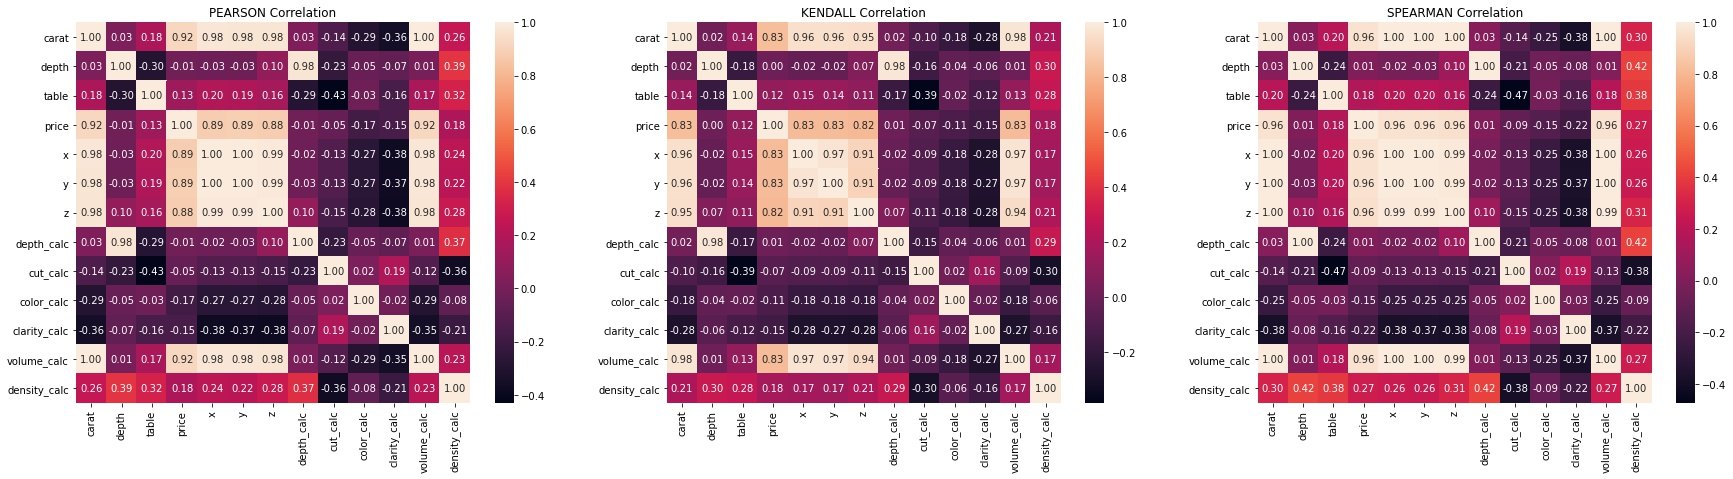

In [26]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(30, 7))
corr_methods = ['pearson', 'kendall', 'spearman']

for i in range(len(corr_methods)):
    sns.heatmap(data_clean.corr(method=corr_methods[i]), annot=True, fmt='.2f', ax=ax[i]);
    ax[i].set_title(f'{corr_methods[i].upper()} Correlation')

plt.show()

In [27]:
data_clean.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(2)

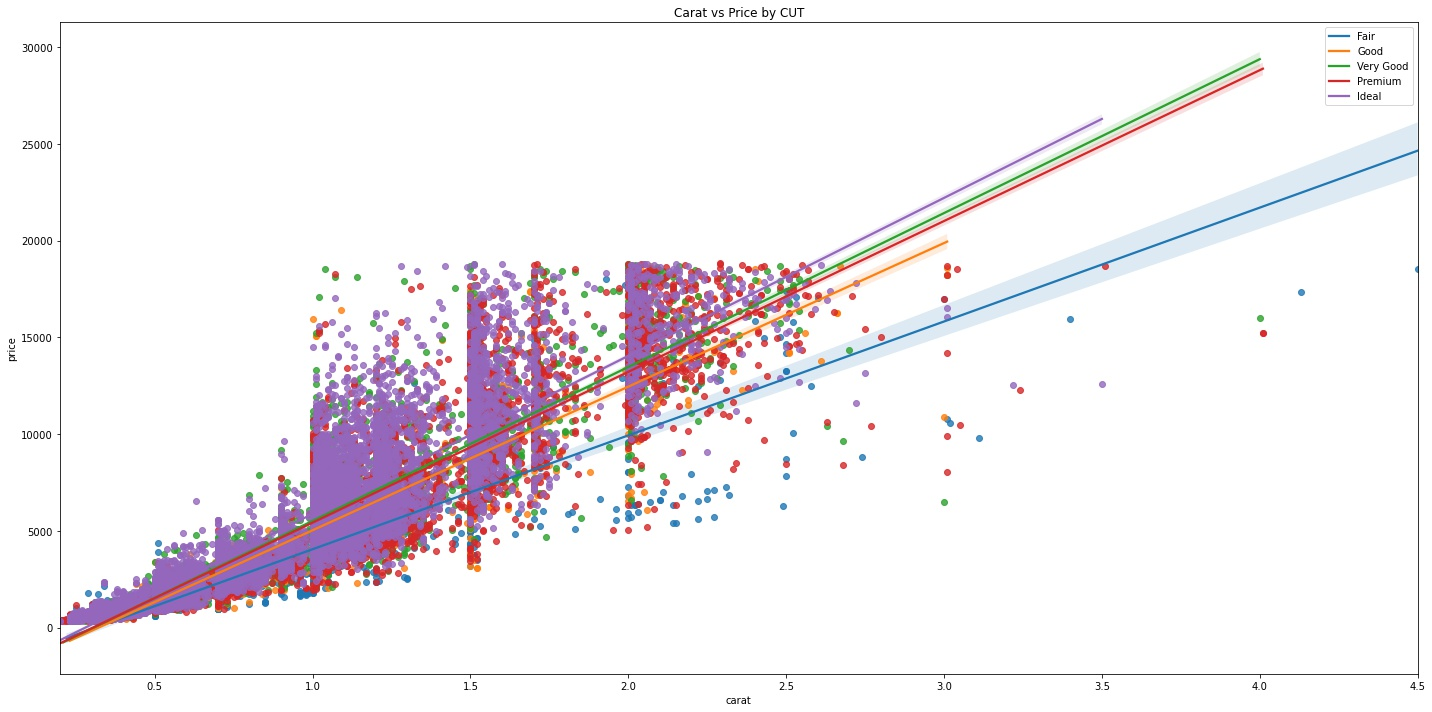

In [28]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

for i in range(len(cut_types)):
    sns.regplot(x='carat', y='price', scatter=True, data=data_clean[data_clean['cut_calc'] == i+1])

ax.set_title(f'Carat vs Price by CUT')
ax.legend(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.tight_layout()
plt.show()

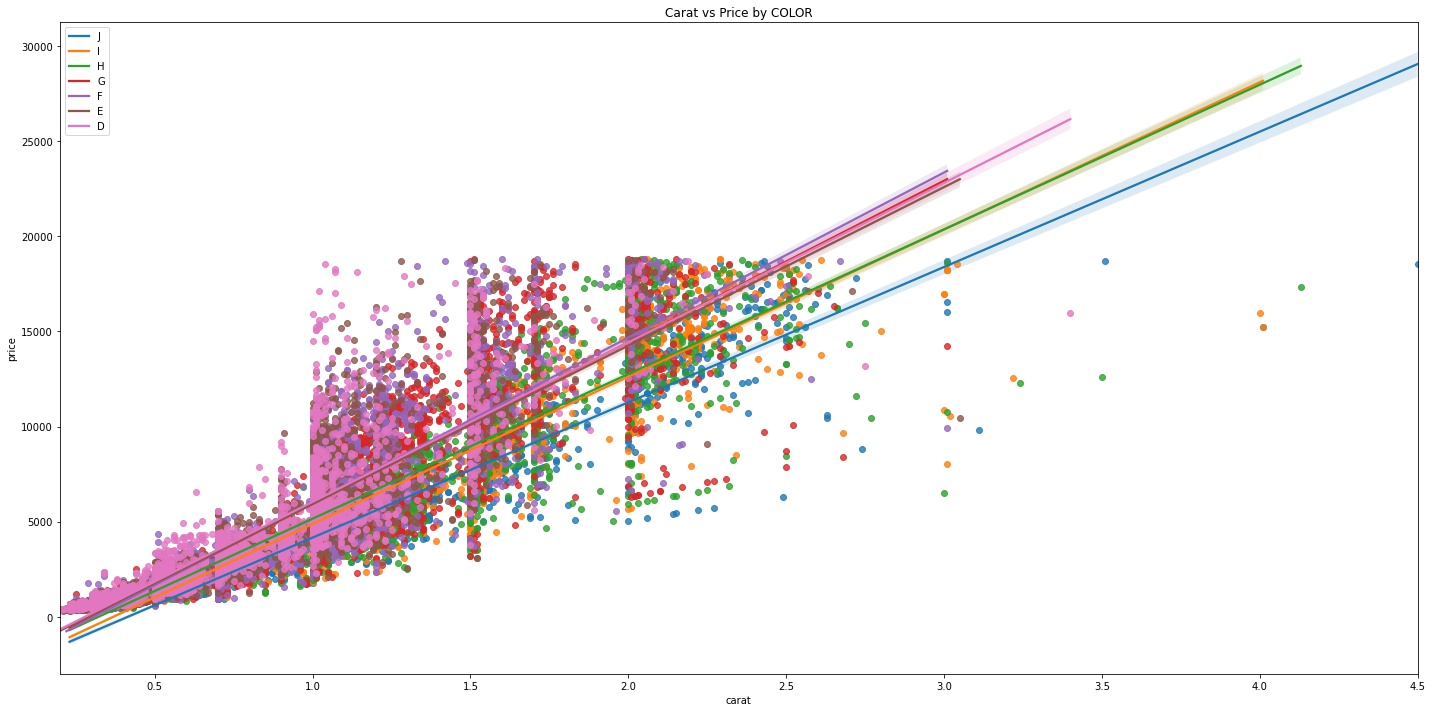

In [29]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

for i in range(len(color_types)):
    sns.regplot(x='carat', y='price', scatter=True,  data=data_clean[data_clean['color_calc'] == i+1])

ax.set_title(f'Carat vs Price by COLOR')
ax.legend(['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.tight_layout()
plt.show()

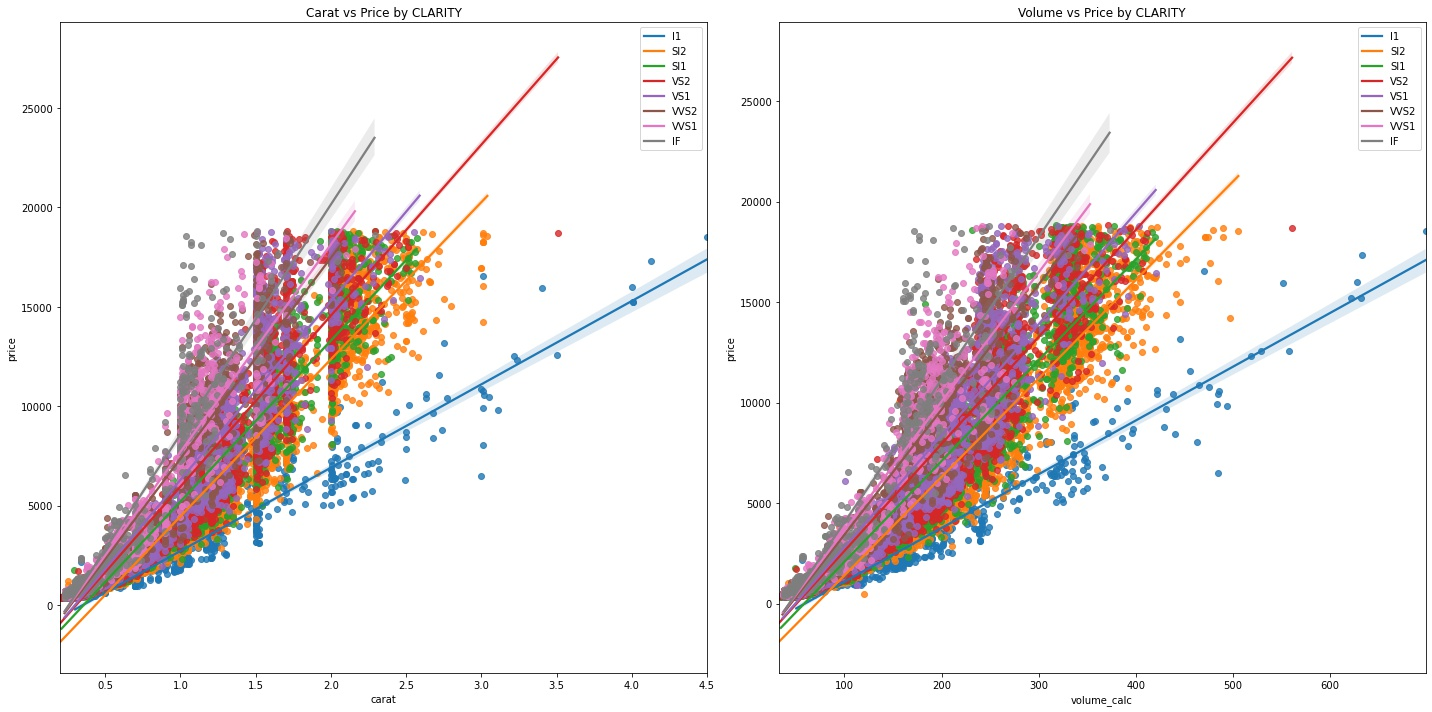

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
ax1 = ax[0]
ax2 = ax[1]


for i in range(len(clarity_types)):
    sns.regplot(x='carat', y='price', scatter=True,  data=data_clean[data_clean['clarity_calc'] == i+1], ax=ax1)
    
for i in range(len(clarity_types)):
    sns.regplot(x='volume_calc', y='price', scatter=True,  data=data_clean[data_clean['clarity_calc'] == i+1], ax=ax2)

ax1.set_title(f'Carat vs Price by CLARITY')
ax1.legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
ax2.set_title(f'Volume vs Price by CLARITY')
ax2.legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.tight_layout()
plt.show()

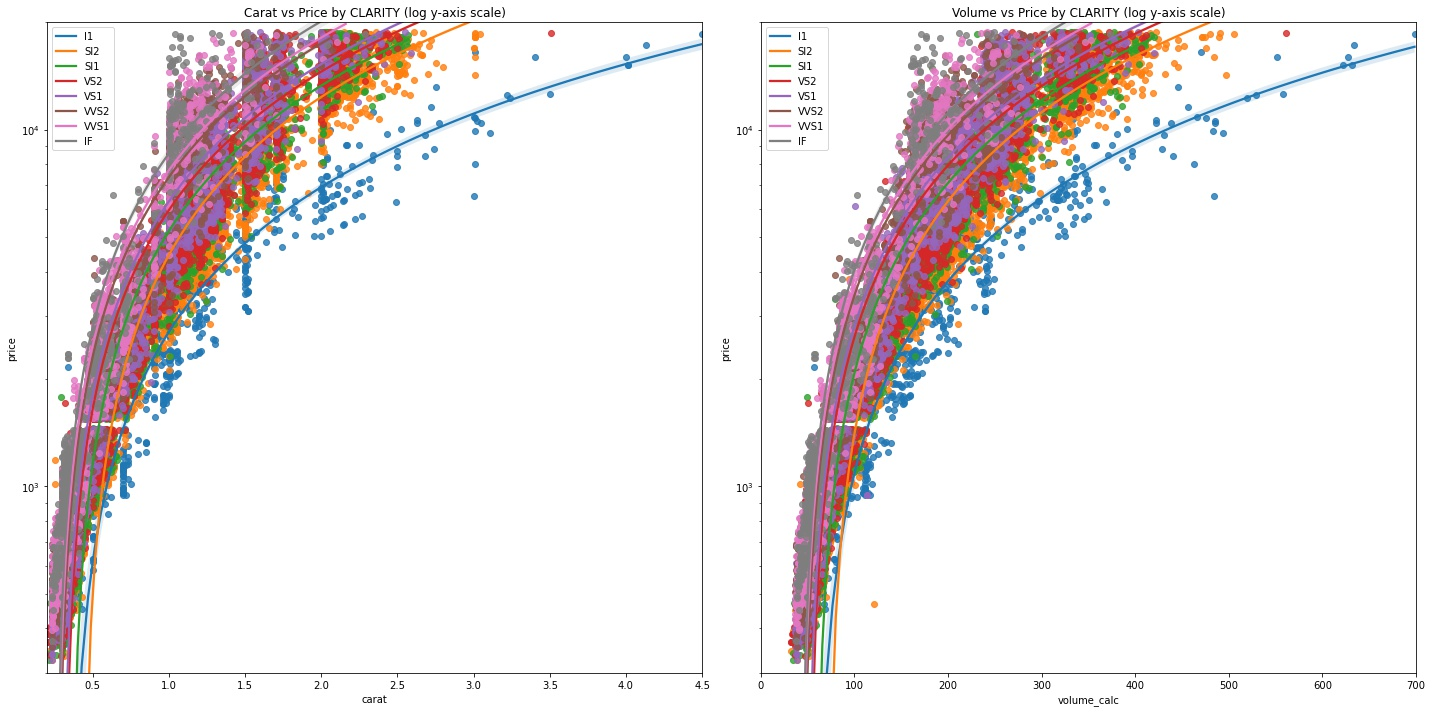

In [31]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
ax1 = ax[0]
ax2 = ax[1]


for i in range(len(clarity_types)):
    sns.regplot(x='carat', y='price', scatter=True,  data=data_clean[data_clean['clarity_calc'] == i+1], ax=ax1)
    
for i in range(len(clarity_types)):
    sns.regplot(x='volume_calc', y='price', scatter=True,  data=data_clean[data_clean['clarity_calc'] == i+1], ax=ax2)

ax1.set_title(f'Carat vs Price by CLARITY (log y-axis scale)')
ax1.legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
ax2.set_title(f'Volume vs Price by CLARITY (log y-axis scale)')
ax2.legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
ax1.set_yscale('log')
ax1.set_ylim(300, 20000)
ax2.set_yscale('log')
ax2.set_ylim(300, 20000)
ax2.set_xlim(0, 700)
plt.tight_layout()
plt.show()

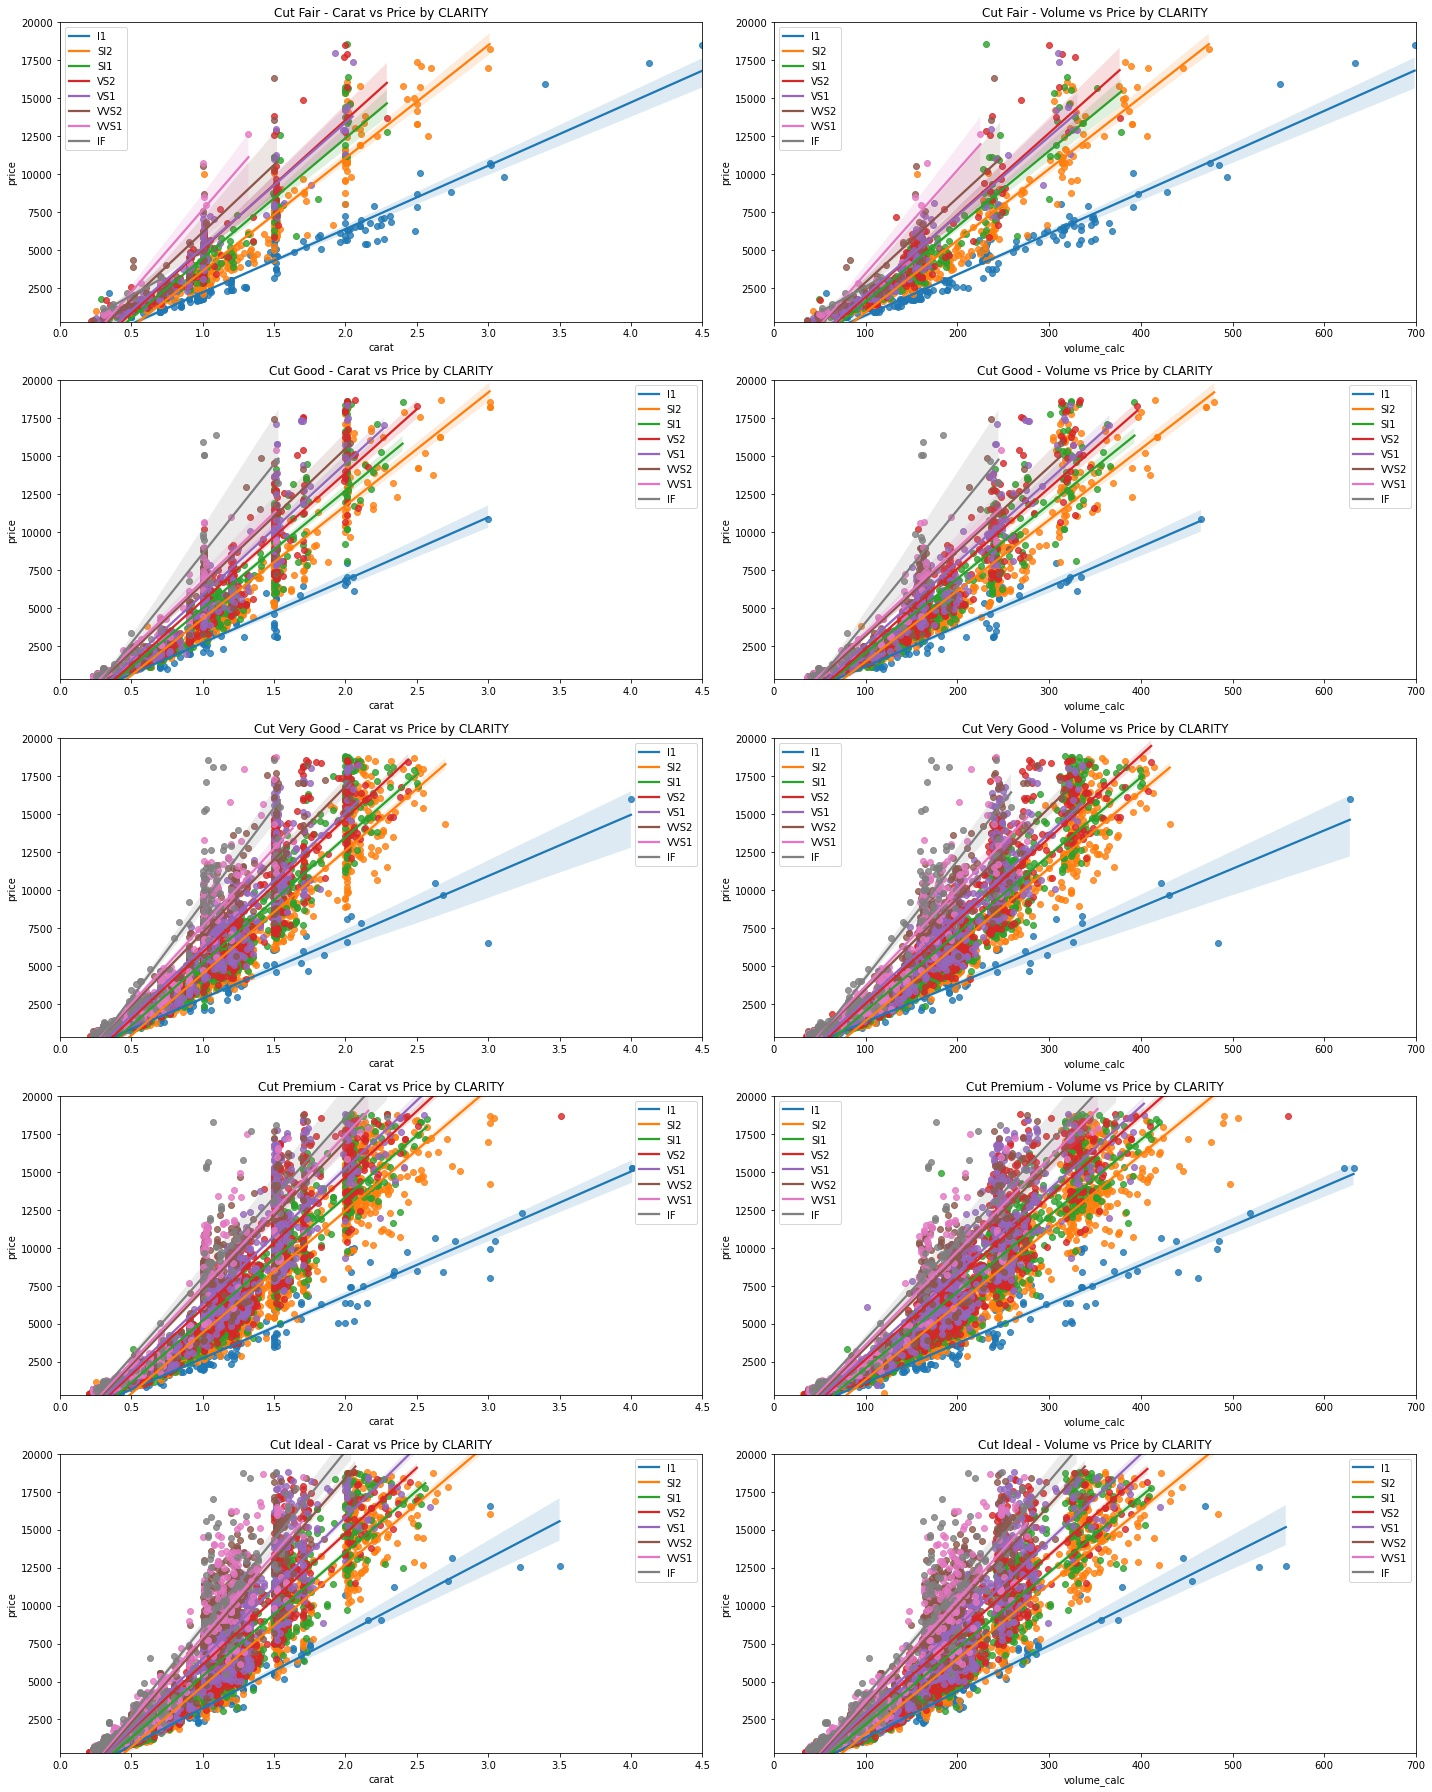

In [32]:
fig, ax = plt.subplots(ncols=2, nrows=len(cut_types), figsize=(20, 25))

for i in range(len(cut_types)):

    for j in range(len(clarity_types)):
        sns.regplot(x='carat', y='price', scatter=True,  data=data_clean[(data_clean['clarity_calc'] == j+1) & (data_clean['cut_calc'] == i+1)], ax = ax[i][0])
        ax[i][0].set_ylim(300, 20000)
        ax[i][0].set_xlim(0, 4.5)
        ax[i][0].set_title(f'Cut {list(cut_dict.keys())[i]} - Carat vs Price by CLARITY')
        ax[i][0].legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
    
    for j in range(len(clarity_types)):
        sns.regplot(x='volume_calc', y='price', scatter=True,  data=data_clean[(data_clean['clarity_calc'] == j+1) & (data_clean['cut_calc'] == i+1)], ax = ax[i][1])
        ax[i][1].set_ylim(300, 20000)
        ax[i][1].set_xlim(0, 700)
        ax[i][1].set_title(f'Cut {list(cut_dict.keys())[i]} - Volume vs Price by CLARITY')
        ax[i][1].legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

plt.tight_layout()
plt.show()

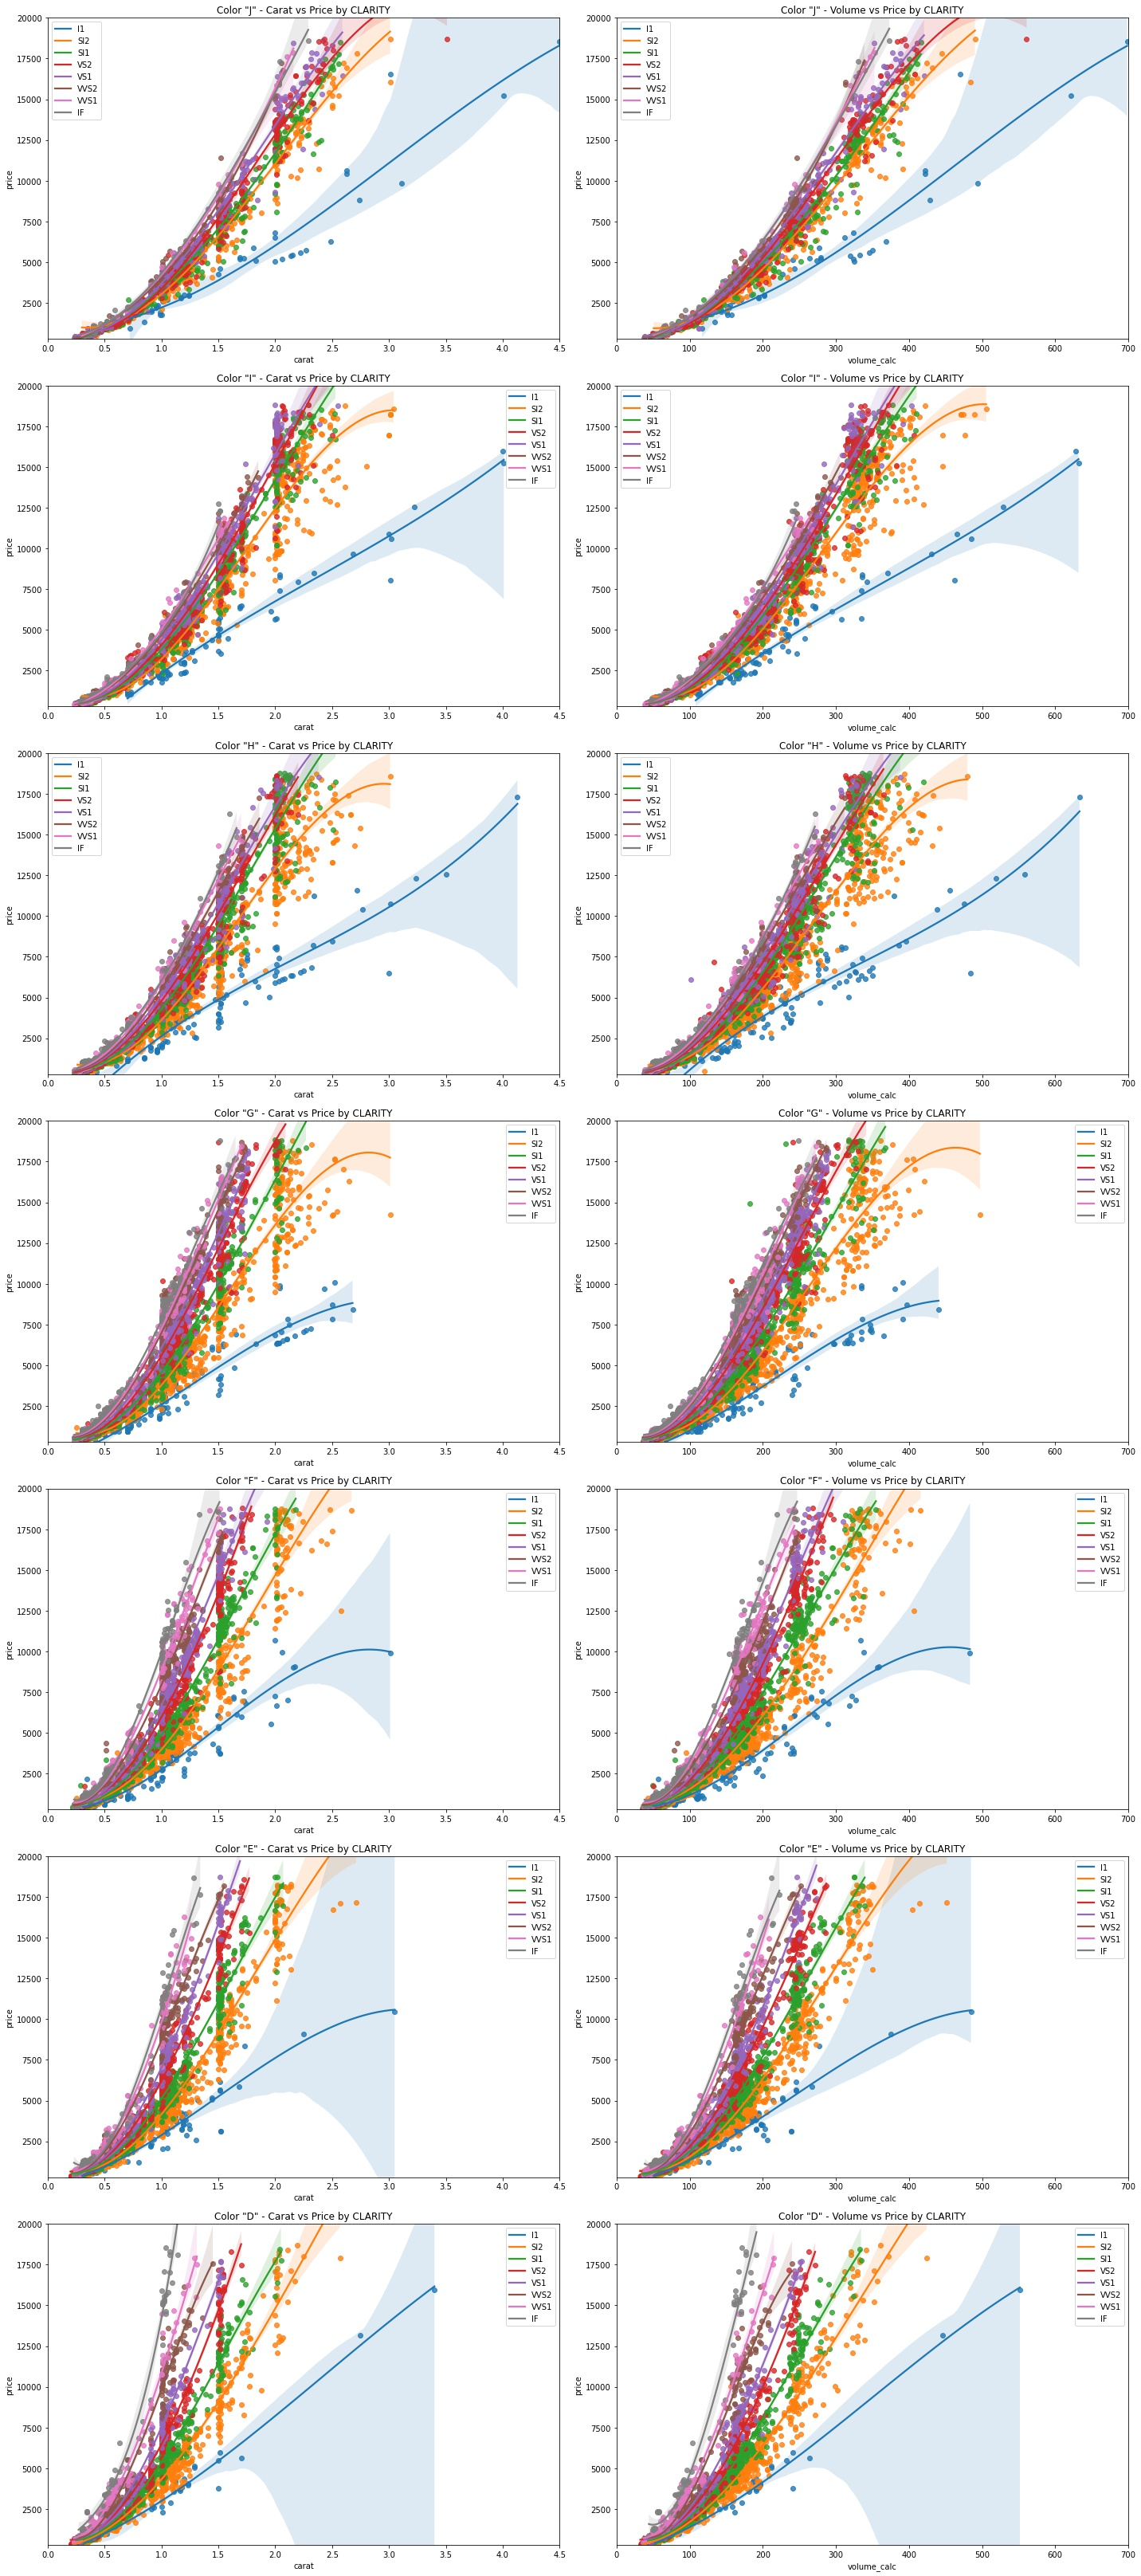

In [33]:
fig, ax = plt.subplots(ncols=2, nrows=len(color_types), figsize=(20, 45))

for i in range(len(color_types)):

    for j in range(len(clarity_types)):
        sns.regplot(x='carat', y='price', scatter=True,  data=data_clean[(data_clean['clarity_calc'] == j+1) & (data_clean['color_calc'] == i+1)], 
                    ax = ax[i][0], order=3)
        ax[i][0].set_ylim(300, 20000)
        ax[i][0].set_xlim(0, 4.5)
        ax[i][0].set_title(f'Color "{list(color_dict.keys())[i]}" - Carat vs Price by CLARITY')
        ax[i][0].legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
    
    for j in range(len(clarity_types)):
        sns.regplot(x='volume_calc', y='price', scatter=True,  data=data_clean[(data_clean['clarity_calc'] == j+1) & (data_clean['color_calc'] == i+1)], 
                    ax = ax[i][1], order=3)
        ax[i][1].set_ylim(300, 20000)
        ax[i][1].set_xlim(0, 700)
        ax[i][1].set_title(f'Color "{list(color_dict.keys())[i]}" - Volume vs Price by CLARITY')
        ax[i][1].legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

plt.tight_layout()
plt.show()

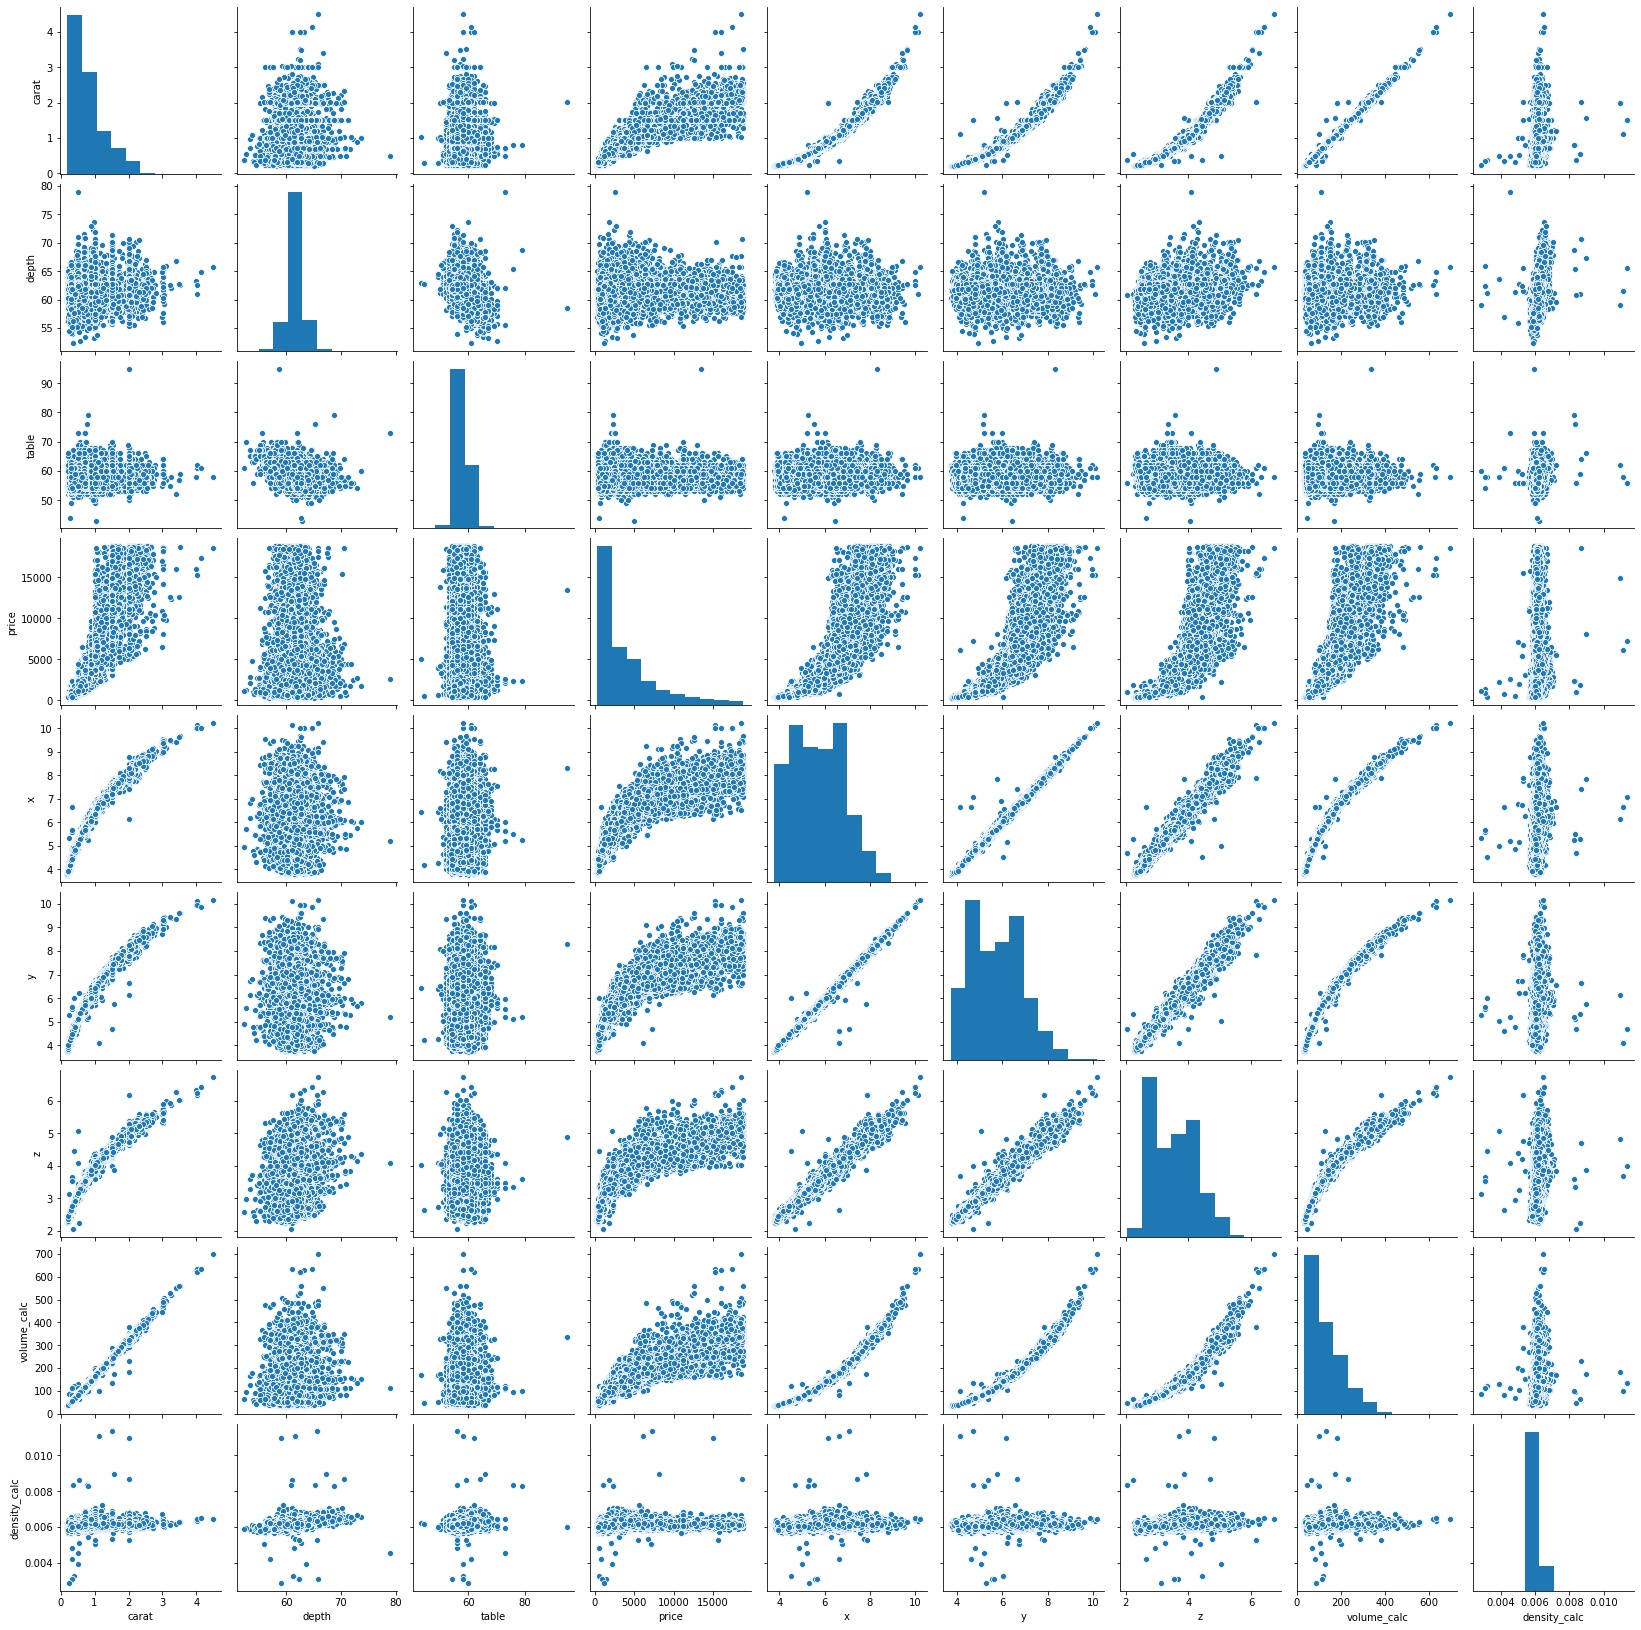

In [34]:
sns.pairplot(data_clean[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'volume_calc', 'density_calc']])
plt.show()

In [35]:
scaler = MinMaxScaler()
data_clean[['cut_calc','color_calc','clarity_calc']] = scaler.fit_transform(data_clean[['cut_calc','color_calc','clarity_calc']])

data_clean['score'] = round(3*data_clean['cut_calc'] + 3*data_clean['color_calc'] + 4*data_clean['clarity_calc'])

In [36]:
data_clean.head()

carat        cut color clarity  depth  table  price     x     y     z  \
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25   
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75   
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65   
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00   
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95   

   depth_calc  cut_calc  color_calc  clarity_calc  volume_calc  density_calc  \
0    0.624082      0.75    0.000000      0.428571   197.096725      0.006139   
1    0.630011      0.50    0.333333      0.428571    52.395750      0.006107   
2    0.654709      0.00    0.500000      0.571429   113.436890      0.006259   
3    0.638298      0.25    1.000000      0.285714    66.268800      0.006187   
4    0.604900      1.00    0.500000      0.285714   168.429975      0.006056   

   score  
0    4.0  
1    4.0  
2    4.0  
3    5.0  
4    6.0

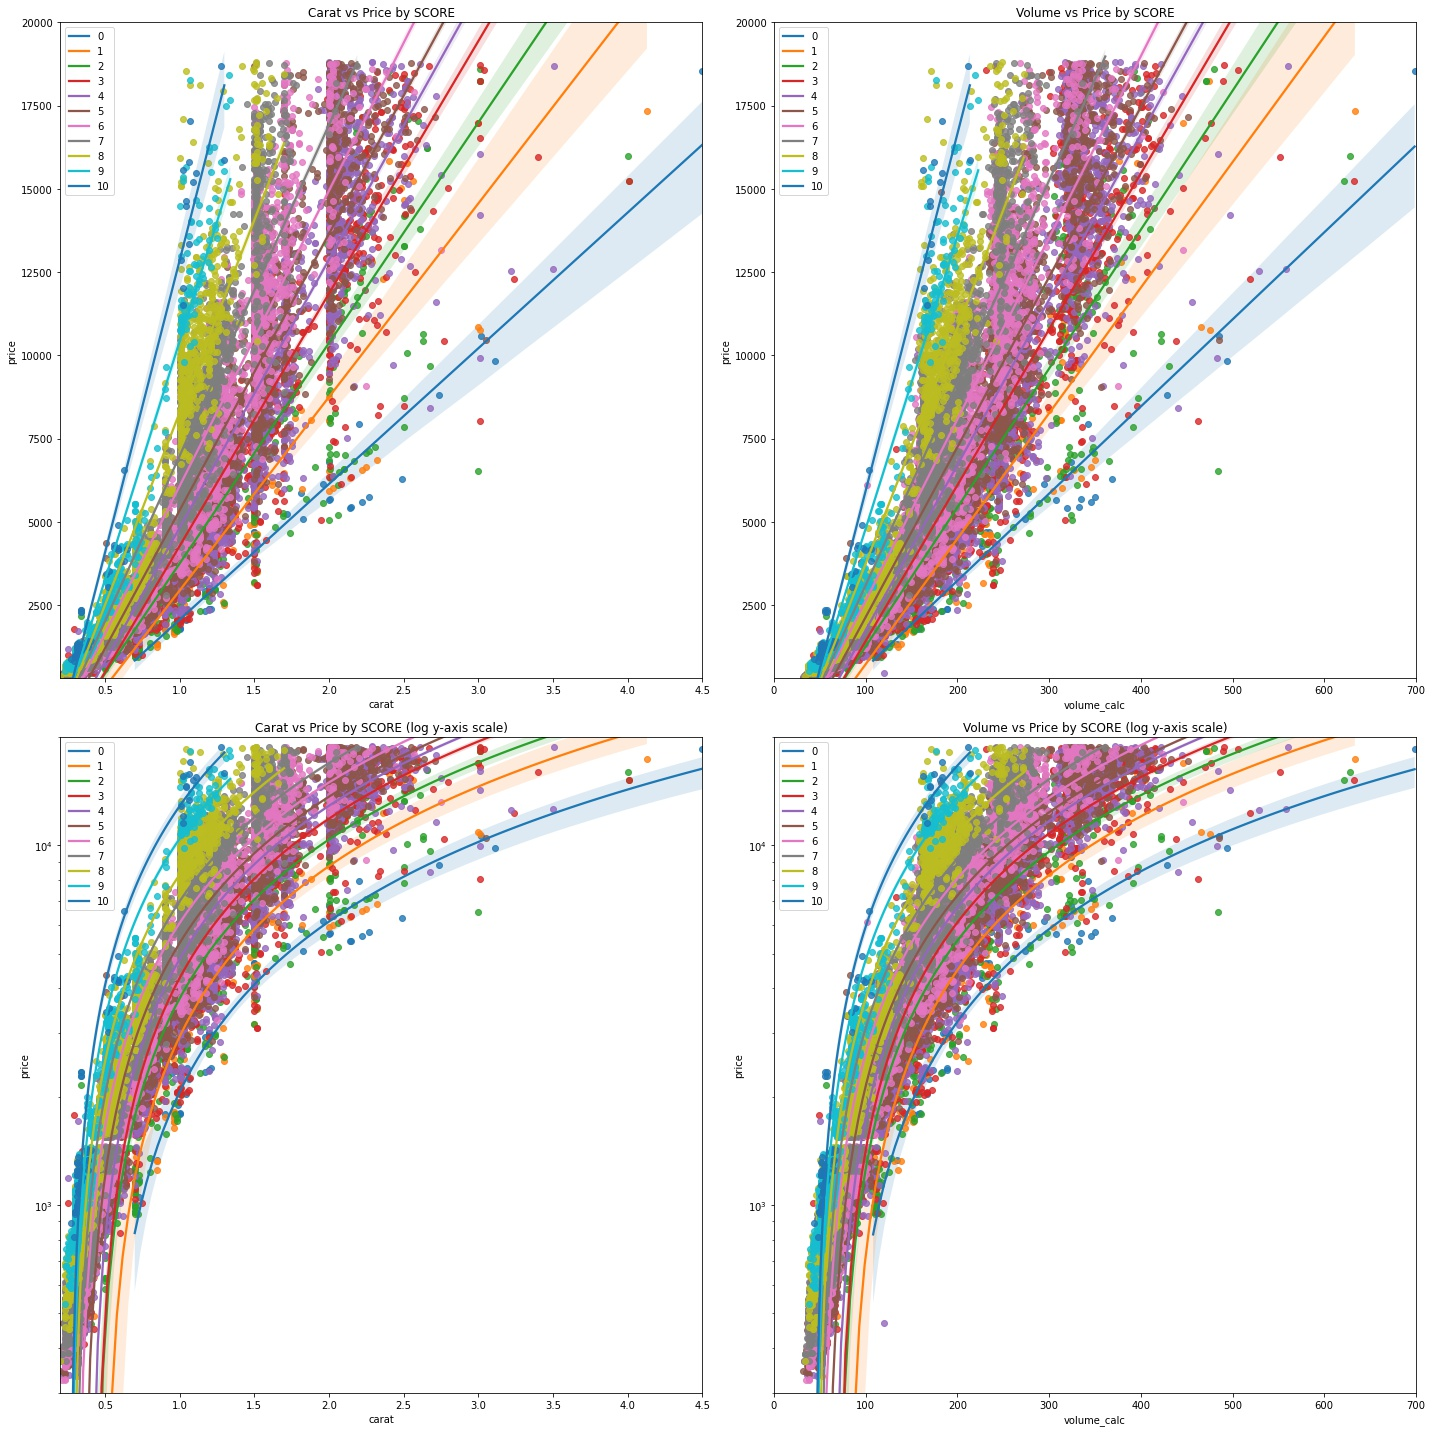

In [37]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax1 = ax[0]
ax2 = ax[1]

for i in range(2):
    for j in range(11):
        sns.regplot(x='carat', y='price', scatter=True,  data=data_clean[data_clean['score'] == j], ax=ax[i][0])
        ax[i][0].set_ylim(300, 20000)
        ax[i][0].legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    
    for j in range(11):
        sns.regplot(x='volume_calc', y='price', scatter=True,  data=data_clean[data_clean['score'] == j], ax=ax[i][1])
        ax[i][1].set_ylim(300, 20000)
        ax[i][1].set_xlim(0, 700)
        ax[i][1].legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

ax[0][0].set_title(f'Carat vs Price by SCORE')
ax[0][1].set_title(f'Volume vs Price by SCORE')
ax[1][0].set_title(f'Carat vs Price by SCORE (log y-axis scale)')
ax[1][1].set_title(f'Volume vs Price by SCORE (log y-axis scale)')
ax[i][0].set_yscale('log')
ax[i][1].set_yscale('log')
plt.tight_layout()
plt.show()

In [38]:
data_clean.to_csv('../data/data_clean.csv')